# Lecture 1

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cospar as cs
cs.settings.set_figure_params(figsize=(4,3))

In [2]:
t=np.arange(10000)*0.01
D=1
L=np.sqrt(t)

Text(0, 0.5, 'Distance')

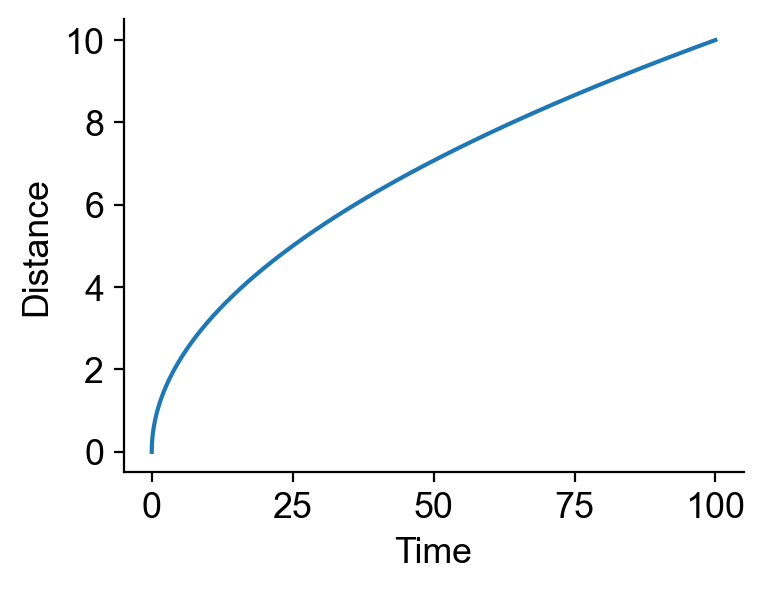

In [3]:
plt.plot(t,L)
plt.xlabel('Time')
plt.ylabel('Distance')

## Simulate diffusion

In [16]:
random_walk=(((np.random.rand(10000)>0.5)-0.5)*2).astype(int)
time=len(random_walk)

<AxesSubplot:ylabel='Count'>

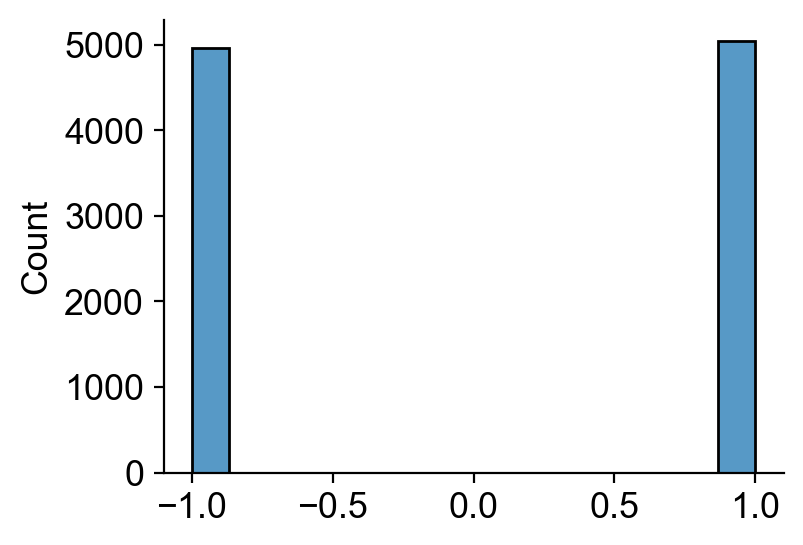

In [17]:
sns.histplot(random_walk)

Text(0, 0.5, 'Position')

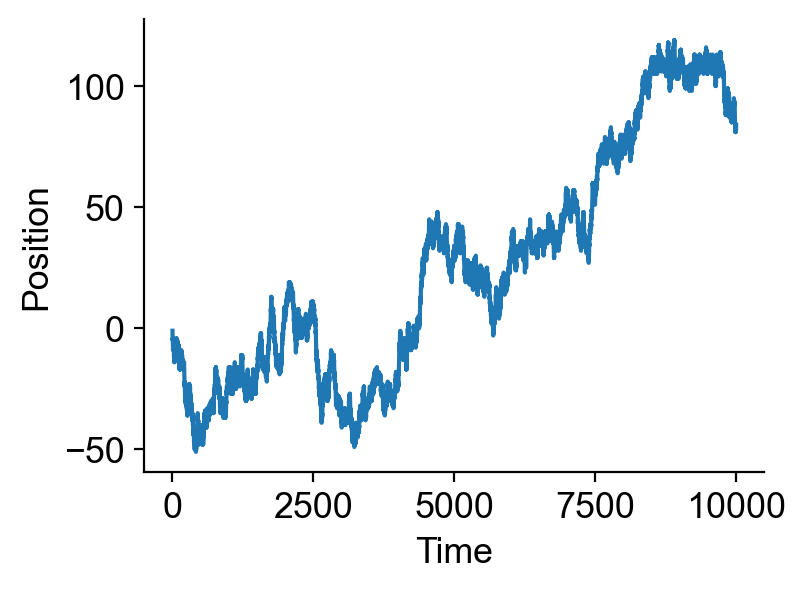

In [18]:
plt.plot(np.arange(time),np.cumsum(random_walk))
plt.xlabel('Time')
plt.ylabel('Position')

In [19]:
abs(np.sum(random_walk))/np.sqrt(time)

0.84

## Lecture 2

In [5]:
# A string variable to hold a DNA sequence
dna_sequence = "ATGCGACTAGCTACG" # An integer variable
sequence_length = len(dna_sequence)
# A float variable
gc_content = 0.466

In [8]:
# Counting nucleotides
g_count = dna_sequence.count('G') 
c_count = dna_sequence.count('C')
# Calculating GC content
gc_content = (g_count + c_count) / len(dna_sequence) 
print(f"The GC content is: {gc_content:.2f}")
# Transcription: replacing Thymine (T) with Uracil (U)
rna_sequence = dna_sequence.replace('T', 'U')
print(f"The transcribed RNA sequence is: {rna_sequence}")

The GC content is: 0.53
The transcribed RNA sequence is: AUGCGACUAGCUACG


In [12]:
def find_restriction_sites(sequence, site):
    """Finds all starting positions of a restriction site in a sequence.""" 
    positions = []
    for i in range(len(sequence) - len(site) + 1):
        if sequence[i:i+len(site)] == site: positions.append(i)
    return positions
# Find all EcoRI sites ('GAATTC')

dna_sequence = "ATGCGACTAGCTACG"+'GAATTC'
ecori_sites = find_restriction_sites(dna_sequence, 'GAATTC') 
print(f"Found EcoRI sites at positions: {ecori_sites}")

Found EcoRI sites at positions: [15]


In [25]:
import numpy as np
from matplotlib import pyplot as plt
# Suppose we have time points and optical density (OD) measurements
time_points = np.array([0, 30, 60, 90, 120, 150]) # in minutes
od_values = np.array([0.05, 0.1, 0.2, 0.4, 0.8, 0.82])
# NO LOOP NEEDED: Convert OD to approximate cell count (e.g., 1 OD = 1e9 cells/mL) cell_counts = od_values * 1e9

In [26]:
# Calculate the change in OD over each interval
delta_od = np.diff(od_values)
delta_time = np.diff(time_points)
# Calculate approximate growth rate
growth_rates = delta_od / delta_time
print("Approximate growth rates:")
print(growth_rates)

Approximate growth rates:
[0.00166667 0.00333333 0.00666667 0.01333333 0.00066667]


In [21]:
# Calculate the average OD and the maximum OD
average_od = np.mean(od_values)
max_od = np.max(od_values)
print(f"Average OD: {average_od:.3f}, Maximum OD: {max_od:.3f}")

Average OD: 0.395, Maximum OD: 0.820


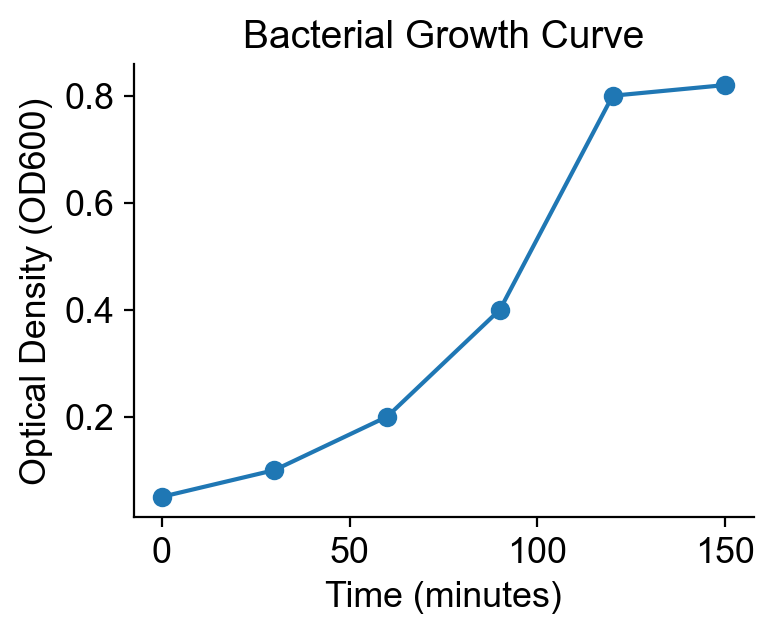

In [24]:
import matplotlib.pyplot as plt 
import numpy as np
time_points = np.array([0, 30, 60, 90, 120, 150]) 
od_values = np.array([0.05, 0.1, 0.2, 0.4, 0.8, 0.82])
# Using the time_points and od_values from the NumPy section
fig, ax = plt.subplots()
# Plot the data
ax.plot(time_points, od_values, marker='o', linestyle='-') # Add labels and a title for clarity
ax.set_xlabel("Time (minutes)")
ax.set_ylabel("Optical Density (OD600)") 
ax.set_title("Bacterial Growth Curve")
# Display the plot
plt.show()

# Lecture 3

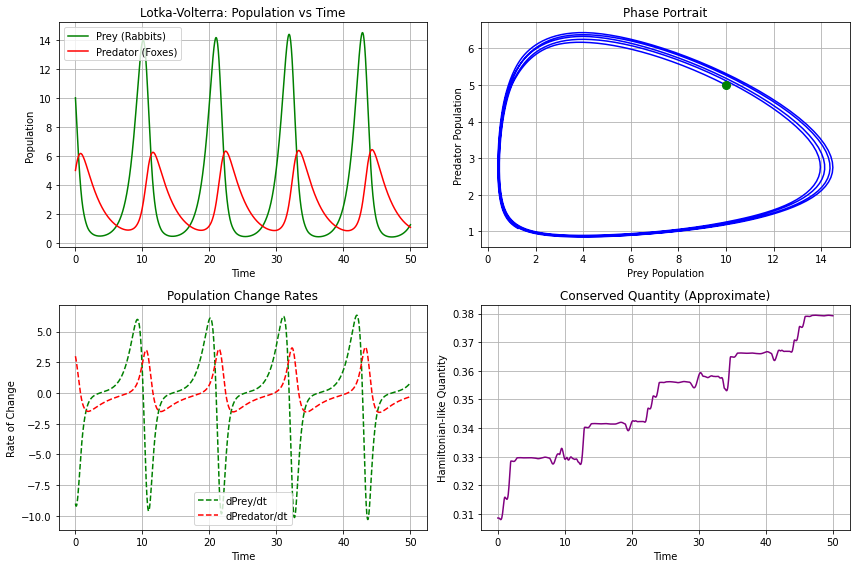

Prey: max=14.49, min=0.42, mean=3.69
Predator: max=6.43, min=0.85, mean=2.84
Period: ~-4.35 time units


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def lotka_volterra(t, z, alpha, beta, delta, gamma):
    """
    Lotka-Volterra equations (predator-prey model)
    
    Parameters:
    t: time
    z: [prey, predator] population values
    alpha: prey growth rate
    beta: predation rate
    delta: predator growth rate
    gamma: predator death rate
    
    Returns:
    dz/dt: [dprey/dt, dpredator/dt]
    """
    x, y = z  # x = prey, y = predator
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

# Parameters (classic values)
alpha = 1.1   # Prey growth rate
beta = 0.4    # Predation rate
delta = 0.1   # Predator growth rate
gamma = 0.4   # Predator death rate

# Initial conditions
initial_conditions = [10, 5]  # [prey, predator]

# Time span
t_span = (0, 50)
t_eval = np.linspace(0, 50, 1000)

# Solve the differential equations
solution = solve_ivp(lotka_volterra, t_span, initial_conditions,
                    args=(alpha, beta, delta, gamma),
                    t_eval=t_eval, method='RK45')

# Extract results
t = solution.t
prey = solution.y[0]
predator = solution.y[1]

# Plot results
plt.figure(figsize=(12, 8))

# Population vs Time
plt.subplot(2, 2, 1)
plt.plot(t, prey, 'g-', label='Prey (Rabbits)')
plt.plot(t, predator, 'r-', label='Predator (Foxes)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lotka-Volterra: Population vs Time')
plt.legend()
plt.grid(True)

# Phase portrait
plt.subplot(2, 2, 2)
plt.plot(prey, predator, 'b-')
plt.plot(prey[0], predator[0], 'go', markersize=8, label='Start')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Phase Portrait')
plt.grid(True)

# Individual rates of change
plt.subplot(2, 2, 3)
dxdt = alpha * prey - beta * prey * predator
dydt = delta * prey * predator - gamma * predator
plt.plot(t, dxdt, 'g--', label='dPrey/dt')
plt.plot(t, dydt, 'r--', label='dPredator/dt')
plt.xlabel('Time')
plt.ylabel('Rate of Change')
plt.title('Population Change Rates')
plt.legend()
plt.grid(True)

# Energy (conserved quantity)
plt.subplot(2, 2, 4)
# Hamiltonian-like quantity: H = δx - γln(x) + βy - αln(y)
H = delta * prey - gamma * np.log(prey + 1e-10) + beta * predator - alpha * np.log(predator + 1e-10)
plt.plot(t, H, 'purple')
plt.xlabel('Time')
plt.ylabel('Hamiltonian-like Quantity')
plt.title('Conserved Quantity (Approximate)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Prey: max={prey.max():.2f}, min={prey.min():.2f}, mean={prey.mean():.2f}")
print(f"Predator: max={predator.max():.2f}, min={predator.min():.2f}, mean={predator.mean():.2f}")
print(f"Period: ~{t[np.argmax(prey)] - t[np.argmin(prey)]:.2f} time units")